In [1]:
import numpy as np
import scipy.optimize

from matplotlib import pyplot as plt


In [ ]:
#Generate a linear model and find the best fit 

# Real data
np.random.seed(121)
theta = 1.2
n_samples = 30
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');


#Parameter estimation

def MSE(theta, x, y):
    N = len(x)
    return 1/N*np.sum((theta*x - y)**2)

def optimize_likelihood(loss_func, theta_i, args):
#    bnds = ((None, None), (0, None))
    bnds = None
    ftol = 10e-6
    res = scipy.optimize.minimize(loss_func, theta_i, args=args, method = 'Nelder-Mead', bounds = bnds, tol = ftol)
    return res.fun, res.x



#Brute force
tt = np.linspace(0,1.5,100)
mse = [MSE(tt[i],x,y) for i in range(len(tt))]
brute_force_theta = tt[np.argmin(mse)]


#Unconstrained optimization 
args= (x,y)
fun , params = optimize_likelihood(MSE, 1, args)

# Bootstrap estimates
def resample_with_replacement(x, y):    
    indxs = np.random.choice(range(len(x)), len(x))    
    x_ = x[indxs]
    y_ = y[indxs]    
    return x_, y_

def bootstrap(x, y, n=2000):
    vals, params = np.zeros(n), np.zeros(n)
    for j in range(n):
        x_,y_ = resample_with_replacement(x, y)
        args= (x_,y_)
        vals[j] , params[j] = optimize_likelihood(MSE, 1, args)
    return vals, params
    

print(MSE(brute_force_theta,x,y), brute_force_theta)
print(fun,params)

In [ ]:
#Plots for bootstrap
    
fig, ax = plt.subplots()

# For each theta_hat, plot model
fun, theta_hats = bootstrap(x, y, n=2000)
for i, theta_hat in enumerate(theta_hats):
    y_hat = theta_hat * x
    ax.plot(x, y_hat, c='r', alpha=0.01, label='Resampled Fits' if i==0 else '')

# Plot observed data
ax.scatter(x, y, label='Observed')

# Plot true fit data
y_true = theta * x
ax.plot(x, y_true, 'g', linewidth=2, label='True Model')

ax.set(
  title='Bootstrapped Slope Estimation',
  xlabel='x',
  ylabel='y'
)

# Change legend line alpha property
handles, labels = ax.get_legend_handles_labels()
handles[0].set_alpha(1)

ax.legend()
plt.show()


fig, ax = plt.subplots()
ax.hist(theta_hats, bins=20, facecolor='C1', alpha=0.75)
ax.axvline(theta, c='g', label=r'True $\theta$')
ax.axvline(np.percentile(theta_hats, 50), color='r', label='Median')
ax.axvline(np.percentile(theta_hats, 2.5), color='b', label='95% CI')
ax.axvline(np.percentile(theta_hats, 97.5), color='b')
ax.legend()
ax.set(
    title='Bootstrapped Confidence Interval',
    xlabel=r'$\hat{{\theta}}$',
    ylabel='count',
    xlim=[1.0, 1.5]
)
plt.show()

In [ ]:
#Generate a multilinear model and find the best fit 
#TO DO : Make it into a class 


# Set random seed for reproducibility
np.random.seed(1234)

# Set parameters
theta_i = [0, -2, -3]
n_samples = 40

# Draw x and calculate y
n_regressors = len(theta_i)
x = np.random.uniform(-2, 2, (n_samples, n_regressors))
noise = np.random.randn(n_samples)
y = np.dot(x,theta_i) + noise

def MSE(theta_i, x, y):
    N = len(x)
    return 1/N*np.sum((x @ theta_i - y)**2)

def optimize_likelihood(loss_func, theta_i, args):
#    bnds = ((None, None), (0, None))
    bnds = None
    ftol = 10e-6
    res = scipy.optimize.minimize(loss_func, theta_i, args=args, method = 'Nelder-Mead', bounds = bnds, tol = ftol)
    return res.fun, res.x



#Unconstrained optimization 
args= (x,y)
params_0 = [1,1,1]
fun , params = optimize_likelihood(MSE, params_0, args)
print(params)

# Bootstrap estimates
def resample_with_replacement(x, y):    
    indxs = np.random.choice(range(len(x)), len(x))    
    x_ = x[indxs]
    y_ = y[indxs]    
    return x_, y_

def bootstrap(x, y, n=2000):
    vals, params = np.zeros(n), np.zeros((n,x.shape[1]))
    for j in range(n):
        x_,y_ = resample_with_replacement(x, y)
        args= (x_,y_)
        vals[j] , params[j] = optimize_likelihood(MSE, params_0, args)
    return vals, params


fun, theta_hats = bootstrap(x, y, n=2000)


In [ ]:
#Generate a polynomial model and find the best fit 
#TO DO: Make it into a class 


### Generate training data
np.random.seed(0)
n_train_samples = 50
x_train = np.random.uniform(-2, 2.5, n_train_samples) # sample from a uniform distribution over [-2, 2.5)
noise = np.random.randn(n_train_samples) # sample from a standard normal distribution
y_train =  x_train**2 - x_train - 2 + noise

### Generate testing data
n_test_samples = 20
x_test = np.random.uniform(-3, 3, n_test_samples) # sample from a uniform distribution over [-3, 3)
noise = np.random.randn(n_test_samples) # sample from a standard normal distribution
y_test =  x_test**2 - x_test - 2 + noise


x = np.zeros((n_samples,highest_rank+1))
x_b = np.random.uniform(-2, 2, (n_samples))
for k in range(highest_rank+1):
    x[:,k] = x_b**k
    
noise = np.random.randn(n_samples)
y = np.dot(x,theta_i) + noise

def MSE(theta_i, x, y):
    N = len(x)
    return 1/N*np.sum((x @ theta_i - y)**2)

def optimize_likelihood(loss_func, theta_i, args):
#    bnds = ((None, None), (0, None))
    bnds = None
    ftol = 10e-6
    res = scipy.optimize.minimize(loss_func, theta_i, args=args, method = 'Nelder-Mead', bounds = bnds, tol = ftol)
    return res.fun, res.x



#Unconstrained optimization 
args= (x,y_test)
params_0 = [1,1,1,1]
fun , params = optimize_likelihood(MSE, params_0, args)
print(params)

# Bootstrap estimates
def resample_with_replacement(x, y):    
    indxs = np.random.choice(range(len(x)), len(x))    
    x_ = x[indxs]
    y_ = y[indxs]    
    return x_, y_

def bootstrap(x, y, n=2000):
    vals, params = np.zeros(n), np.zeros((n,x.shape[1]))
    for j in range(n):
        x_,y_ = resample_with_replacement(x, y)
        args= (x_,y_)
        vals[j] , params[j] = optimize_likelihood(MSE, params_0, args)
    return vals, params


fun, theta_hats = bootstrap(x, y, n=2000)


In [ ]:
from sklearn.model_selection import KFold


In [3]:
# @title Data retrieval and loading

import os
import hashlib
import requests
import scipy.io as sio


fname = "RGCdata.mat"
url = "https://osf.io/mzujs/download"
expected_md5 = "1b2977453020bce5319f2608c94d38d0"
                
                
data = sio.loadmat(fname)  # loadmat is a function in scipy.io
dt_stim = data['dtStim'].item()  # .item extracts a scalar value

# Extract the stimulus intensity
stim = data['Stim'].squeeze()  # .squeeze removes dimensions with 1 element

# Extract the spike counts for one cell
cellnum = 2
spikes = data['SpCounts'][:, cellnum]

# Don't use all of the timepoints in the dataset, for speed
keep_timepoints = 20000
stim = stim[:keep_timepoints]
spikes = spikes[:keep_timepoints]


print(dt_stim)

0.008340605


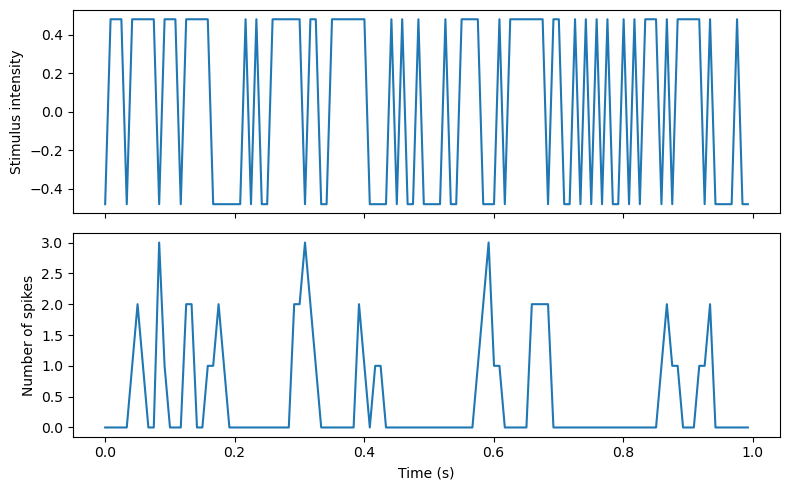

In [4]:
# @title Plotting Functions

def plot_stim_and_spikes(stim, spikes, dt, nt=120):
    """
    Show time series of stim intensity and spike counts.

    Args:
        stim (1D array): vector of stimulus intensities
        spikes (1D array): vector of spike counts
        dt (number): duration of each time step
        nt (number): number of time steps to plot

  """
    timepoints = np.arange(nt)
    time = timepoints * dt

    f, (ax_stim, ax_spikes) = plt.subplots(
    nrows=2, sharex=True, figsize=(8, 5),
    )
    ax_stim.plot(time, stim[timepoints])
    ax_stim.set_ylabel('Stimulus intensity')

    ax_spikes.plot(time, spikes[timepoints])
    ax_spikes.set_xlabel('Time (s)')
    ax_spikes.set_ylabel('Number of spikes')

    f.tight_layout()
    plt.show()


def plot_glm_matrices(X, y, nt=50):
    """
    Show X and Y as heatmaps.

    Args:
    X (2D array): Design matrix.
    y (1D or 2D array): Target vector.

    """
    from matplotlib.colors import BoundaryNorm
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    Y = np.c_[y]  # Ensure Y is 2D and skinny

    f, (ax_x, ax_y) = plt.subplots(
    ncols=2,
    figsize=(6, 8),
    sharey=True,
    gridspec_kw=dict(width_ratios=(5, 1)),
    )
    norm = BoundaryNorm([-1, -.2, .2, 1], 256)
    imx = ax_x.pcolormesh(X[:nt], cmap="coolwarm", norm=norm)

    ax_x.set(
    title="X\n(lagged stimulus)",
    xlabel="Time lag (time bins)",
    xticks=[4, 14, 24],
    xticklabels=['-20', '-10', '0'],
    ylabel="Time point (time bins)",
    )
    plt.setp(ax_x.spines.values(), visible=True)

    divx = make_axes_locatable(ax_x)
    caxx = divx.append_axes("right", size="5%", pad=0.1)
    cbarx = f.colorbar(imx, cax=caxx)
    cbarx.set_ticks([-.6, 0, .6])
    cbarx.set_ticklabels(np.sort(np.unique(X)))

    norm = BoundaryNorm(np.arange(y.max() + 1), 256)
    imy = ax_y.pcolormesh(Y[:nt], cmap="magma", norm=norm)
    ax_y.set(
    title="Y\n(spike count)",
    xticks=[]
    )
    ax_y.invert_yaxis()
    plt.setp(ax_y.spines.values(), visible=True)

    divy = make_axes_locatable(ax_y)
    caxy = divy.append_axes("right", size="30%", pad=0.1)
    cbary = f.colorbar(imy, cax=caxy)
    cbary.set_ticks(np.arange(y.max()) + .5)
    cbary.set_ticklabels(np.arange(y.max()))
    plt.show()


def plot_spike_filter(theta, dt, show=True, **kws):
    """Plot estimated weights based on time lag model.

    Args:
    theta (1D array): Filter weights, not including DC term.
    dt (number): Duration of each time bin.
    kws: Pass additional keyword arguments to plot()
    show (boolean): To plt.show or not the plot.
    """
    d = len(theta)
    t = np.arange(-d + 1, 1) * dt

    ax = plt.gca()
    ax.plot(t, theta, marker="o", **kws)
    ax.axhline(0, color=".2", linestyle="--", zorder=1)
    ax.set(
    xlabel="Time before spike (s)",
    ylabel="Filter weight",
    )
    if show:
        plt.show()


def plot_spikes_with_prediction(spikes, predicted_spikes, dt, nt=50, t0=120, **kws):
    """Plot actual and predicted spike counts.

    Args:
    spikes (1D array): Vector of actual spike counts
    predicted_spikes (1D array): Vector of predicted spike counts
    dt (number): Duration of each time bin.
    nt (number): Number of time bins to plot
    t0 (number): Index of first time bin to plot.
    show (boolean): To plt.show or not the plot.
    kws: Pass additional keyword arguments to plot()

    """
    t = np.arange(t0, t0 + nt) * dt

    f, ax = plt.subplots()
    lines = ax.stem(t, spikes[:nt])
    plt.setp(lines, color=".5")
    lines[-1].set_zorder(1)
    kws.setdefault("linewidth", 3)
    yhat, = ax.plot(t, predicted_spikes[:nt], **kws)
    ax.set(
      xlabel="Time (s)",
      ylabel="Spikes",
    )
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.legend([lines[0], yhat], ["Spikes", "Predicted"])
    plt.show()
    
    
    
plot_stim_and_spikes(stim, spikes, dt_stim)


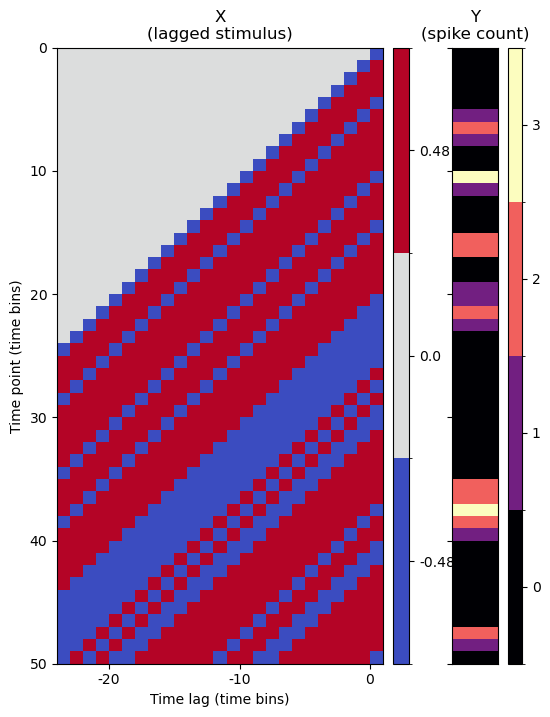

In [16]:
#Here we create the design matrix

def design_matrix(stim, d):
    padded_stim = np.concatenate([np.zeros(d - 1), stim])
    T = len(stim)  
    X = np.zeros((T, d))
    for i in range(T):
        X[i] = padded_stim[i:i+d] 

    return X


# Make design matrix
d = 25
X = design_matrix(stim,d)

# Visualize
plot_glm_matrices(X, spikes, nt=50)


8616.14305177557


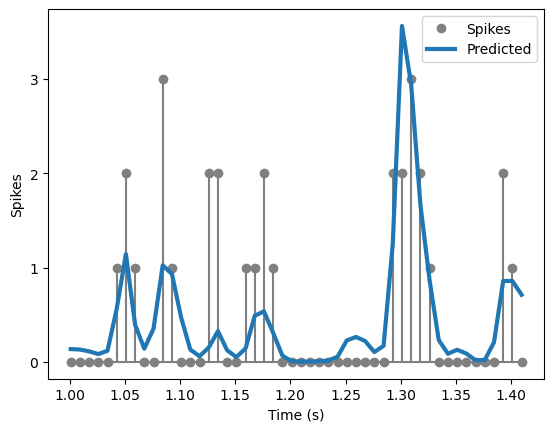

In [40]:
# ENCODING: predict neural responses starting from the input 


def log_likehood(theta, X, y, meth):
    lambda_t = np.exp(X @ theta)
    if meth == 'Poisson':
        log_lik = y @ np.log(lambda_t) - np.einsum( 'i-> ' , lambda_t)
    else: 
        print('Distribution not available yet')
    return (-1)*log_lik


def glm_params(stim, spikes, d, meth):
    y = spikes
    constant = np.ones_like(y)
    X = np.column_stack([constant, design_matrix(stim,d)])

    x0 = np.random.normal(0, .2, d + 1)

    # Find parameters that minmize the negative log likelihood function
    ftol = 1e-6
    args = (X, y, meth)
    res = scipy.optimize.minimize(log_likehood, x0, args=args, method = 'BFGS', tol = ftol)
    return res.fun, res.x


def predict_spike_counts_lnp(stim, spikes, theta=None, d=25):
    y = spikes
    constant = np.ones_like(spikes)
    X = np.column_stack([constant, design_matrix(stim,d)])
    if theta is None: 
        theta = glm_params(X, y, d)

    yhat =  np.exp(X @ theta)
    return yhat


# Predict spike counts
yhat = predict_spike_counts_lnp(stim, spikes, theta_poisson)


# Fit LNP model
meth = 'Poisson'
fun, theta_poisson = glm_params(stim, spikes, d, meth)
print(fun)


plot_spikes_with_prediction(spikes, yhat, dt_stim)

In [124]:
#@title Data retrieval and loading
import os
import requests
import hashlib

url = "https://osf.io/r9gh8/download"
fname = "W1D4_steinmetz_data.npz"
expected_md5 = "d19716354fed0981267456b80db07ea8"

if not os.path.isfile(fname):
    try:
        r = requests.get(url)
    except requests.ConnectionError:
        print("!!! Failed to download data !!!")
    else:
        if r.status_code != requests.codes.ok:
            print("!!! Failed to download data !!!")
        elif hashlib.md5(r.content).hexdigest() != expected_md5:
            print("!!! Data download appears corrupted !!!")
        else:
            with open(fname, "wb") as fid:
                fid.write(r.content)

def load_steinmetz_data(data_fname=fname):
    with np.load(data_fname) as dobj:
        data = dict(**dobj)
    return data



data = load_steinmetz_data()
for key, val in data.items():
    print(key, val.shape)
    
    
y = data["choices"]
X = data["spikes"]

spikes (276, 691)
choices (276,)


Accuracy on the training data: 93.84%
0.07229058449574753


Text(0.5, 1.0, '0.8586134453781513')

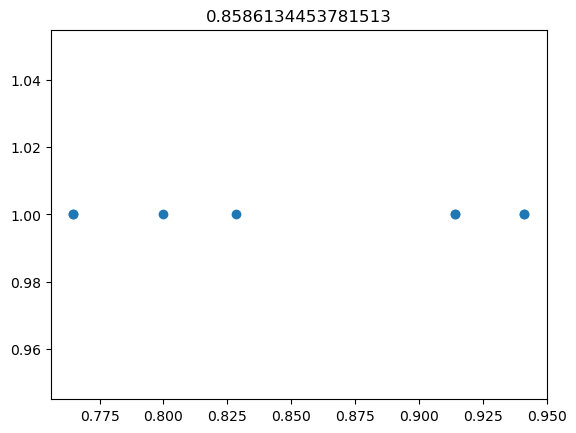

In [163]:
# DECODING: predict input starting from neural responses
#To do: make into a class


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score


# Define the model

#reg = 'l1' or 'l2'
reg = 'l1'

if reg == 'l2' : solver = 'lbfgs'
if reg == 'l1' : solver = 'saga'


log_reg = LogisticRegression(penalty=reg, C = 1, solver = solver, max_iter = 5000)



# Fit it to data
log_reg.fit(X, y)
y_pred = log_reg.predict(X)


def compute_accuracy(X, y, model):
    y_pred = model.predict(X)
    k = np.nonzero(y-y_pred)[0].shape[0]
    accuracy = (len(y) -k) /len(y)
    return accuracy


# Compute train accuracy
train_accuracy = compute_accuracy(X, y, log_reg)
print(f"Accuracy on the training data: {train_accuracy:.2%}")


accuracies = cross_val_score(log_reg, X, y, cv=8)  # k=8 cross validation

accuracies_mean = np.mean(accuracies)
accuracies_std = np.std(accuracies)

print(accuracies_std)
plt.scatter(accuracies, np.ones(len(accuracies)))
plt.title(str(accuracies_mean))

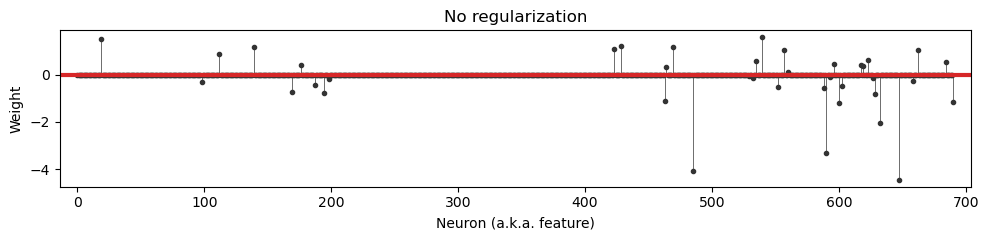

In [165]:
def plot_weights(models, sharey=True):
    n = len(models)
    f = plt.figure(figsize=(10, 2.5 * n))
    axs = f.subplots(n, sharex=True, sharey=sharey)
    axs = np.atleast_1d(axs)

    for ax, (title, model) in zip(axs, models.items()):
        ax.margins(x=.02)
        stem = ax.stem(model.coef_.squeeze())
        stem[0].set_marker(".")
        stem[0].set_color(".2")
        stem[1].set_linewidths(.5)
        stem[1].set_color(".2")
        stem[2].set_visible(False)
        ax.axhline(0, color="C3", lw=3)
    ax.set(ylabel="Weight", title=title)
    ax.set(xlabel="Neuron (a.k.a. feature)")
    f.tight_layout()
    plt.show()

plot_weights({"No regularization": log_reg})


In [187]:
# Model selection 

# Fit it to data
log_reg.fit(X, y)
y_pred = log_reg.predict(X)


def model_selection(X, y, reg, C_list, k):
    l = len(C_list)
    accuracies = np.zeros(l)
    
    if reg == 'l2' : solver = 'lbfgs'
    if reg == 'l1' : solver = 'saga'

    for j,C in enumerate(C_list):
        log_reg = LogisticRegression(penalty=reg, C = C, solver = solver, max_iter = 5000)
        acs =  cross_val_score(log_reg, X, y, cv=k) 
        accuracies[j] = np.mean(acs)
    return accuracies

        
        
        
        
#reg = 'l1' or 'l2'
reg = 'l2'
k = 8
# Use log-spaced values for C
C_values = np.logspace(-4, 4, 9)

# Compute accuracies
l2_accuracies = model_selection(X, y, reg, C_values, k)


1.0


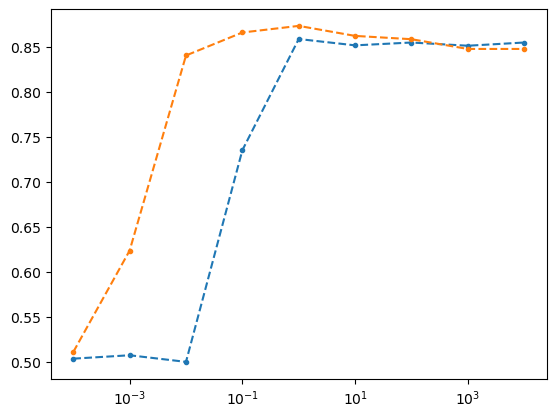

In [188]:
plt.plot(C_values, accuracies, '.--')
plt.plot(C_values, l2_accuracies, '.--')

plt.xscale('log')

indx = np.argmax(accuracies)

print(C_values[indx])

In [184]:
C_values

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])

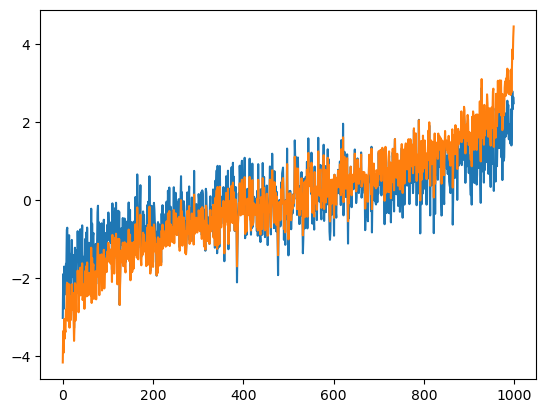

In [4]:
def get_data(cov_matrix):
    mean = np.array([0, 0])
    X = np.random.multivariate_normal(mean, cov_matrix, size=1000)
    indices_for_sorting = np.argsort(X[:, 0])
    X = X[indices_for_sorting, :]
    return X



def exact_covariance_matrix(sigma_1,sigma_2,rho):
    cov = rho*np.sqrt(sigma_1**2*sigma_2**2)
    cov_matrix = np.array([[sigma_1, cov], [cov, sigma_1]])
    return cov_matrix


# Set parameters
np.random.seed(2020)  # set random seed
variance_1 = 1
variance_2 = 1
corr_coef = 0.8

# Compute covariance matrix
exact_cov_matrix = exact_covariance_matrix(variance_1, variance_2, corr_coef)

X_data = get_data(exact_cov_matrix)

plt.plot(X_data.T[1])

eig, egs = scipy.linalg.eigh(exact_cov_matrix)

egs = np.flip(egs, axis =0)

X_new = X_data@egs

plt.plot(X_new.T[1]  )

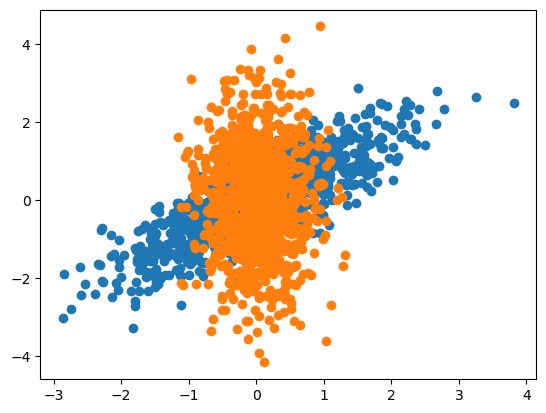

In [5]:
plt.scatter(X_data.T[0],X_data.T[1])
plt.scatter(X_new.T[0],X_new.T[1])


In [20]:
def get_data(cov_matrix):
    mean = np.array([0, 0])
    X = np.random.multivariate_normal(mean, cov_matrix, size=1000)
    indices_for_sorting = np.argsort(X[:, 0])
    X = X[indices_for_sorting, :]
    return X


def exact_covariance_matrix(sigma_1,sigma_2,rho):
    cov = rho*np.sqrt(sigma_1**2*sigma_2**2)
    cov_matrix = np.array([[sigma_1, cov], [cov, sigma_1]])
    return cov_matrix


def sample_covariance_matrix(X):
    X_zero_mean = X - np.mean(X_data,0)
    cov_matrix = 1 / X.shape[0] * X.T @ X 
    return cov_matrix
    
    
    

# Set parameters
np.random.seed(2020)  # set random seed
variance_1 = 1
variance_2 = 1
corr_coef = 0.8




# Set parameters
np.random.seed(2020)  # set random seed
variance_1 = 1
variance_2 = 1
corr_coef = 0.8

# Calculate covariance matrix
exact_cov_matrix = exact_covariance_matrix(variance_1, variance_2, corr_coef)
print(exact_cov_matrix)

# Generate data with that covariance matrix
X = get_data(exact_cov_matrix)

# Get sample covariance matrix
sample_cov_matrix = sample_covariance_matrix(X)
print(sample_cov_matrix)


[[1.  0.8]
 [0.8 1. ]]
[[0.99340438 0.82361988]
 [0.82361988 1.01289649]]


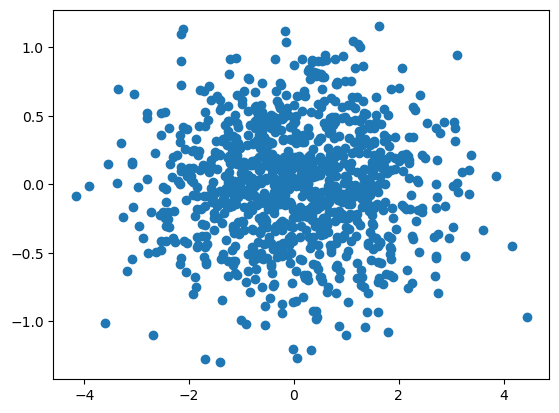

In [29]:
def pca(X):
    
    X_zero_mean = X - np.mean(X_data,0)
    cov_matrix = 1 / X.shape[0] * X.T @ X 

    ei, egs = scipy.linalg.eigh(cov_matrix)
    
    ei = np.flip(ei)
    egs = np.flip(egs, axis = 1)
    
    X_new = X@egs
    
    return X_new, egs, ei

score, evectors, evals = pca(X)


plt.scatter(score.T[0],score.T[1])    

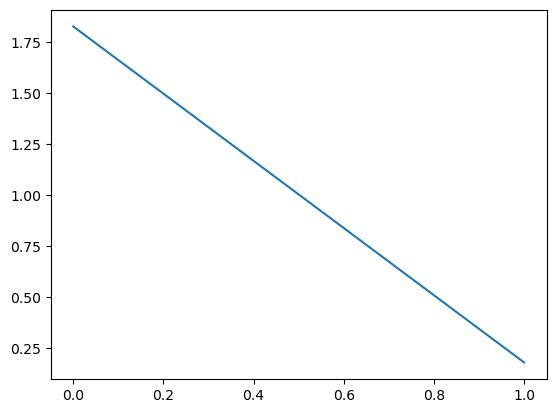

In [37]:
plt.plot(evals)